In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import model_settings as settings
from datetime import datetime
import os
import shutil
from lstm import LSTM_Model

In [3]:
tf.config.list_physical_devices('GPU')

2022-04-26 09:50:26.152604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 09:50:26.162967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 09:50:26.163696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Prepare training and validation dataset split

In [4]:
df_train = pd.read_csv(f"./data/{settings.DATASET}")
y = df_train.pop("y").values.astype('float32')
X = df_train[settings.COLUMNS_TO_USE].values.astype('float32')
del df_train

no_rows = X.shape[0]
data_valid = X[int(no_rows*0.8):,:]
y_valid = y[int(no_rows*0.8):]
data_train = X[:int(no_rows*0.8),:]
y_train = y[:int(no_rows*0.8)]

input_dim = X.shape[1]

Reshaping X data to be on the correct form for input to a LSTM architecture: 
(batch_size, sequence_length, features)

In [5]:
from utils import reshape_for_LSTM

X_train = reshape_for_LSTM(data_train, settings.SEQUENCE_LENGTH)
y_train = y_train[settings.SEQUENCE_LENGTH:]
X_valid = reshape_for_LSTM(data_valid, settings.SEQUENCE_LENGTH)
y_valid = y_valid[settings.SEQUENCE_LENGTH:]

### Define model

In [6]:
model_name = datetime.now().strftime("%d_%m_%H_%M_%S")
lstm = LSTM_Model(model_name, input_dim, settings)

2022-04-26 09:50:27.664353: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-26 09:50:27.665686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 09:50:27.666405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 09:50:27.666975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

### Train model

Epoch 1/20


2022-04-26 09:50:33.517984: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200



Epoch 1: val_loss improved from inf to 0.00318, saving model to ./models/26_04_09_50_27/model.h5


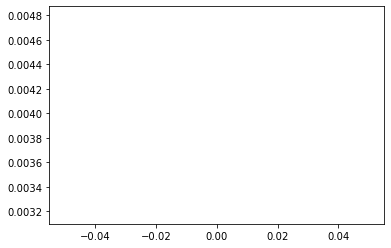

5608/5608 - 56s - loss: 0.0048 - val_loss: 0.0032 - 56s/epoch - 10ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.00318 to 0.00286, saving model to ./models/26_04_09_50_27/model.h5


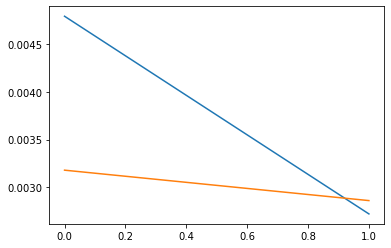

5608/5608 - 50s - loss: 0.0027 - val_loss: 0.0029 - 50s/epoch - 9ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.00286 to 0.00227, saving model to ./models/26_04_09_50_27/model.h5


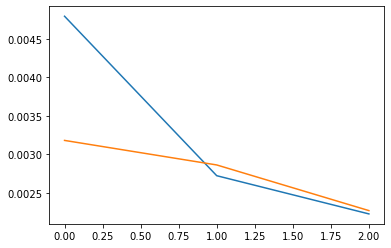

5608/5608 - 50s - loss: 0.0022 - val_loss: 0.0023 - 50s/epoch - 9ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.00227 to 0.00185, saving model to ./models/26_04_09_50_27/model.h5


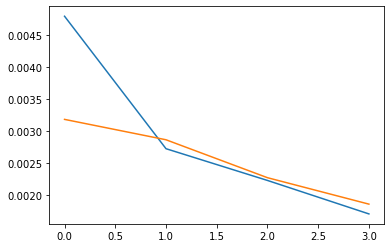

5608/5608 - 50s - loss: 0.0017 - val_loss: 0.0019 - 50s/epoch - 9ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.00185 to 0.00166, saving model to ./models/26_04_09_50_27/model.h5


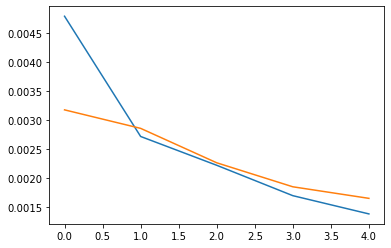

5608/5608 - 49s - loss: 0.0014 - val_loss: 0.0017 - 49s/epoch - 9ms/step
Epoch 6/20

Epoch 6: val_loss improved from 0.00166 to 0.00144, saving model to ./models/26_04_09_50_27/model.h5


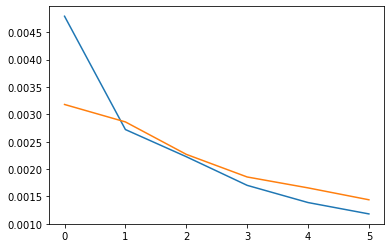

5608/5608 - 50s - loss: 0.0012 - val_loss: 0.0014 - 50s/epoch - 9ms/step
Epoch 7/20

Epoch 7: val_loss improved from 0.00144 to 0.00134, saving model to ./models/26_04_09_50_27/model.h5


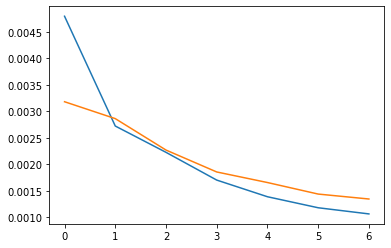

5608/5608 - 50s - loss: 0.0011 - val_loss: 0.0013 - 50s/epoch - 9ms/step
Epoch 8/20

Epoch 8: val_loss improved from 0.00134 to 0.00134, saving model to ./models/26_04_09_50_27/model.h5


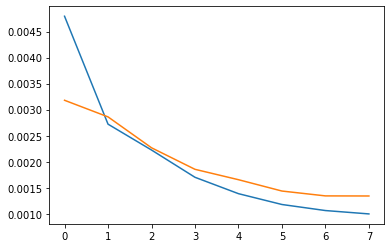

5608/5608 - 50s - loss: 9.9821e-04 - val_loss: 0.0013 - 50s/epoch - 9ms/step
Epoch 9/20

Epoch 9: val_loss improved from 0.00134 to 0.00131, saving model to ./models/26_04_09_50_27/model.h5


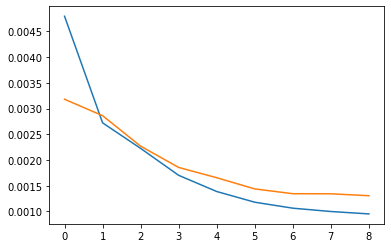

5608/5608 - 50s - loss: 9.5147e-04 - val_loss: 0.0013 - 50s/epoch - 9ms/step
Epoch 10/20

Epoch 10: val_loss improved from 0.00131 to 0.00129, saving model to ./models/26_04_09_50_27/model.h5


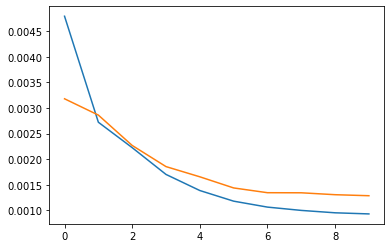

5608/5608 - 49s - loss: 9.2965e-04 - val_loss: 0.0013 - 49s/epoch - 9ms/step
Epoch 11/20

Epoch 11: val_loss did not improve from 0.00129


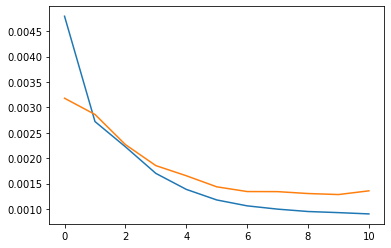

5608/5608 - 49s - loss: 9.0418e-04 - val_loss: 0.0014 - 49s/epoch - 9ms/step
Epoch 12/20

Epoch 12: val_loss improved from 0.00129 to 0.00121, saving model to ./models/26_04_09_50_27/model.h5


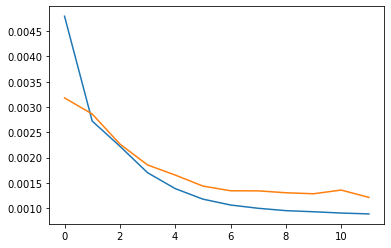

5608/5608 - 50s - loss: 8.8693e-04 - val_loss: 0.0012 - 50s/epoch - 9ms/step
Epoch 13/20

Epoch 13: val_loss did not improve from 0.00121


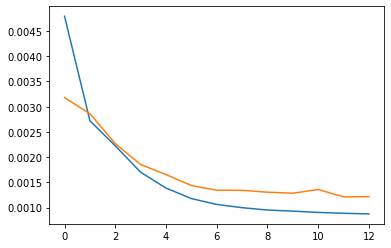

5608/5608 - 50s - loss: 8.7464e-04 - val_loss: 0.0012 - 50s/epoch - 9ms/step
Epoch 14/20

Epoch 14: val_loss improved from 0.00121 to 0.00121, saving model to ./models/26_04_09_50_27/model.h5


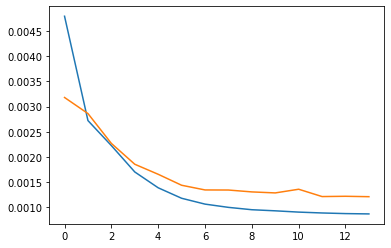

5608/5608 - 50s - loss: 8.6822e-04 - val_loss: 0.0012 - 50s/epoch - 9ms/step
Epoch 15/20

Epoch 15: val_loss improved from 0.00121 to 0.00118, saving model to ./models/26_04_09_50_27/model.h5


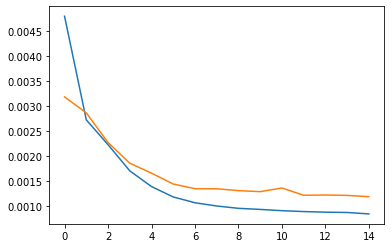

5608/5608 - 50s - loss: 8.3977e-04 - val_loss: 0.0012 - 50s/epoch - 9ms/step
Epoch 16/20

Epoch 16: val_loss improved from 0.00118 to 0.00115, saving model to ./models/26_04_09_50_27/model.h5


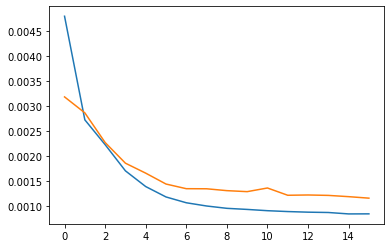

5608/5608 - 50s - loss: 8.4103e-04 - val_loss: 0.0012 - 50s/epoch - 9ms/step
Epoch 17/20

Epoch 17: val_loss improved from 0.00115 to 0.00115, saving model to ./models/26_04_09_50_27/model.h5


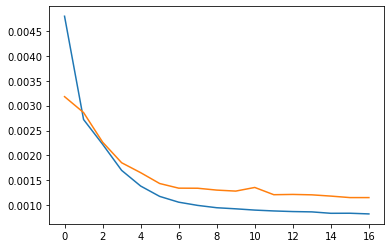

5608/5608 - 51s - loss: 8.2742e-04 - val_loss: 0.0012 - 51s/epoch - 9ms/step
Epoch 18/20

Epoch 18: val_loss improved from 0.00115 to 0.00110, saving model to ./models/26_04_09_50_27/model.h5


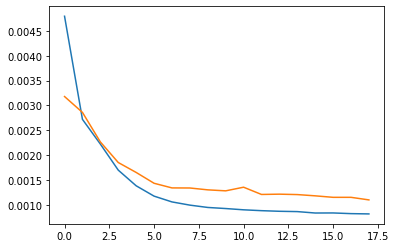

5608/5608 - 50s - loss: 8.2167e-04 - val_loss: 0.0011 - 50s/epoch - 9ms/step
Epoch 19/20

Epoch 19: val_loss did not improve from 0.00110


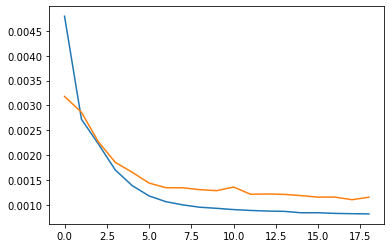

5608/5608 - 51s - loss: 8.1719e-04 - val_loss: 0.0012 - 51s/epoch - 9ms/step
Epoch 20/20

Epoch 20: val_loss did not improve from 0.00110


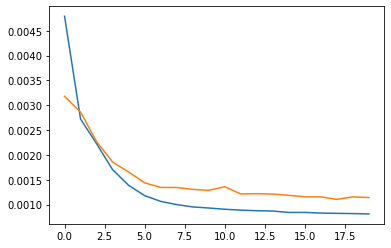

5608/5608 - 51s - loss: 8.1043e-04 - val_loss: 0.0011 - 51s/epoch - 9ms/step


In [7]:
lstm.fit(X_train, y_train, X_valid, y_valid)

### Validate

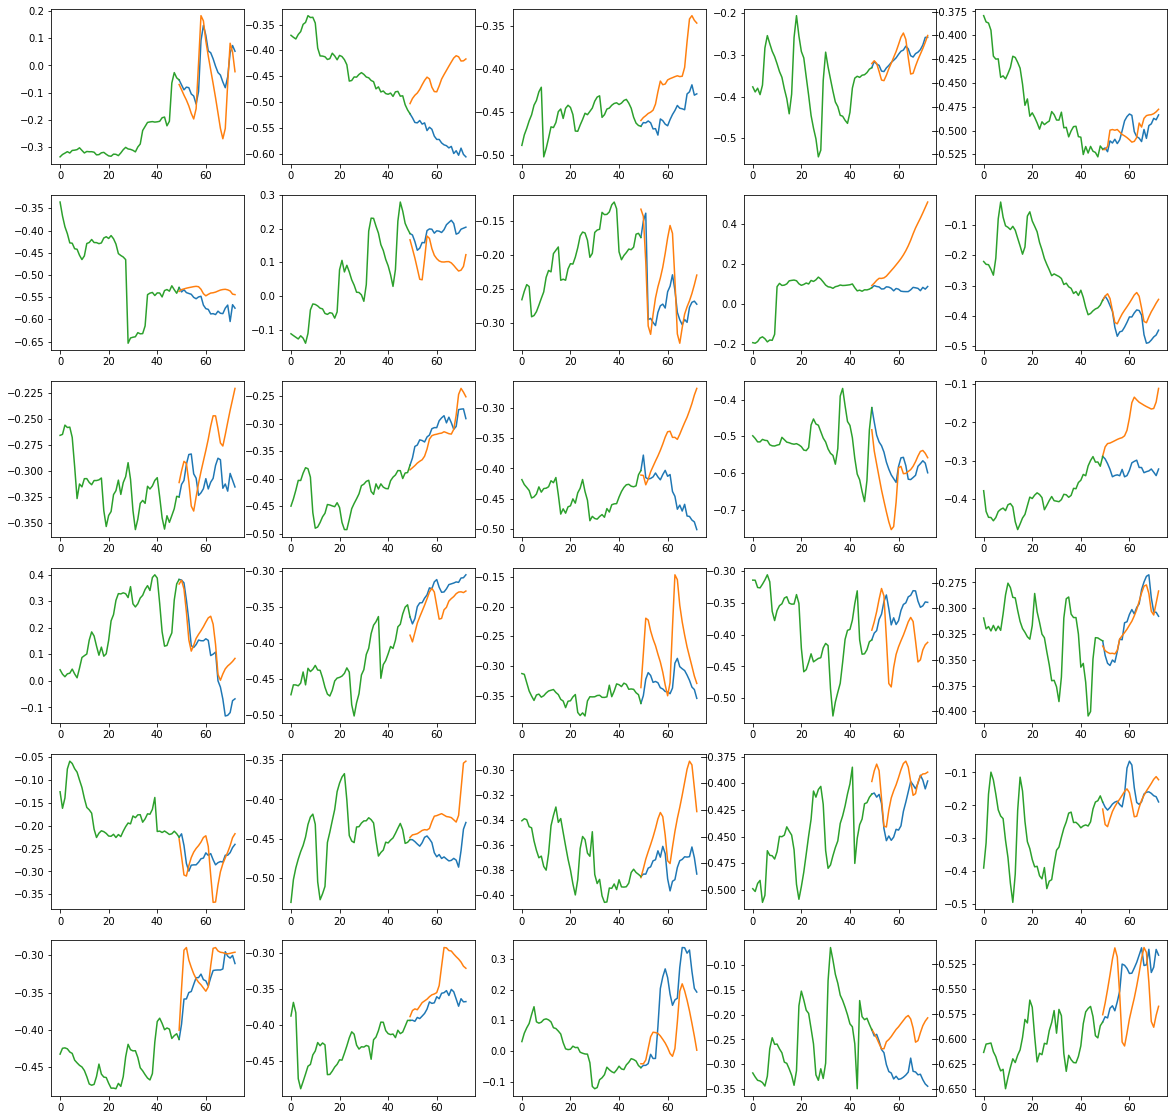

In [8]:
from utils import plot_random
plot_random(X, y, 30, lstm)